In [1]:
import pandas as pd
import numpy as np
import os
import cv2
import matplotlib.pyplot as plt

In [2]:
#collects all the images from the folders.
def collect_all(folder):
    images = []
    for filename in os.listdir(folder):
        if filename == 'desktop.ini':
            pass
        else:        
            #print(filename)
            im = cv2.imread(f'{folder}/{filename}')
            #print(im.shape)
            images.append(im)

    return np.array(images)

In [3]:
folder1 = './Test'
X_test = collect_all(folder1)
print(X_test.shape)

(280, 250, 250, 3)


In [4]:
folder2 = './Train'
X_train = collect_all(folder2)
print(X_train.shape)

(2240, 250, 250, 3)


In [5]:
folder3 = './Val'
X_val = collect_all(folder3)
print(X_val.shape)

(280, 250, 250, 3)


In [6]:
y_test = pd.read_excel(r'C:/Users/kjcox/Google Drive/UAB/Classes/DL/Final/test_label.xlsx',header=None,usecols=[1,1])

y_test = y_test.to_numpy()

y_test = np.squeeze(y_test)

print(y_test.shape)

(280,)


In [7]:
y_train = pd.read_excel(r'C:/Users/kjcox/Google Drive/UAB/Classes/DL/Final/train_label.xlsx',header=None,usecols=[1,1])

y_train = y_train.to_numpy()

y_train = np.squeeze(y_train)
print(y_train.shape)

(2240,)


In [8]:
y_val = pd.read_excel(r'C:/Users/kjcox/Google Drive/UAB/Classes/DL/Final/val_label.xlsx',header=None,usecols=[1,1])

y_val = y_val.to_numpy()

y_val = np.squeeze(y_val)
print(y_val.shape)

(280,)


So far, we have X_test, y_test, X_train, y_train, X_val, y_val

In [9]:
mean_image = np.mean(X_train, axis=0)
X_train = X_train.astype('float32')
X_val = X_val.astype('float32')
X_test = X_test.astype('float32')

X_train -= mean_image
X_val -= mean_image
X_test -= mean_image


In [10]:
#reshape data to rows
X_train = X_train.reshape(X_train.shape[0], -1)
X_val = X_val.reshape(X_val.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

print('X_train shape: ',X_train.shape)
print('y_train shape: ',y_train.shape)
print('X_val shape: ', X_val.shape)
print('y_val shape: ', y_val.shape)
print('X_test shape: ', X_test.shape)
print('y_test shape: ', y_test.shape)

X_train shape:  (2240, 187500)
y_train shape:  (2240,)
X_val shape:  (280, 187500)
y_val shape:  (280,)
X_test shape:  (280, 187500)
y_test shape:  (280,)


In [11]:
from __future__ import print_function
import numpy as np
import matplotlib.pyplot as plt

from cs665.classifiers.neural_net import TwoLayerNet
from cs665.gradient_check import eval_numerical_gradient

In [12]:
input_size = 250 * 250 * 3
hidden_size = 50
num_classes = 7
net = TwoLayerNet(input_size, hidden_size, num_classes)

# Train the network
stats = net.train(X_train, y_train, X_val, y_val,
            num_iters=1000, batch_size=200,
            learning_rate=1e-4, learning_rate_decay=0.95,
            reg=0.25, verbose=True)

# Predict on the validation set
val_acc = (net.predict(X_val) == y_val).mean()
print('Validation accuracy: ', val_acc)


iteration 0 / 1000: loss 1.969340
iteration 100 / 1000: loss 1.770125
iteration 200 / 1000: loss 1.101180
iteration 300 / 1000: loss 0.637451
iteration 400 / 1000: loss 0.267667
iteration 500 / 1000: loss 0.172593
iteration 600 / 1000: loss 0.168643
iteration 700 / 1000: loss 0.102605
iteration 800 / 1000: loss 0.078580
iteration 900 / 1000: loss 0.078594
Validation accuracy:  0.9428571428571428


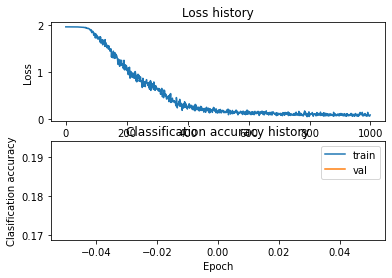

In [13]:
plt.subplot(2, 1, 1)
plt.plot(stats['loss_history'])
plt.title('Loss history')
plt.xlabel('Iteration')
plt.ylabel('Loss')

plt.subplot(2, 1, 2)
plt.plot(stats['train_acc_history'], label='train')
plt.plot(stats['val_acc_history'], label='val')
plt.title('Classification accuracy history')
plt.xlabel('Epoch')
plt.ylabel('Clasification accuracy')
plt.legend()
plt.show()

In [14]:
print(stats['train_acc_history'])

[0.17]


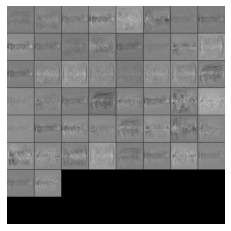

In [16]:
from cs665.vis_utils import visualize_grid

# Visualize the weights of the network

def show_net_weights(net):
    W1 = net.params['W1']
    #print(W1.shape)
    W1 = W1.reshape(250, 250, 3, -1).transpose(3, 0, 1, 2)
    #print(W1.shape)
    plt.imshow(visualize_grid(W1, padding=3).astype('uint8'))
    plt.gca().axis('off')
    plt.show()

show_net_weights(net)

In [20]:
test_acc = (net.predict(X_test) == y_test).mean()
print('Test accuracy: ', test_acc)

Test accuracy:  0.9785714285714285


In [27]:
print(net.predict(X_test))

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 3 3 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 2 3 2 3 3 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 1 5 5 5 5 4 5 5 5 5 5 5 5 5 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6
 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6]


In [29]:
prediction = net.predict(X_test)

pred_names= []
for i in prediction:
    if i==0:
        pred_names.append('distribute')
    if i==1:
        pred_names.append('ineq')
    if i==2:
        pred_names.append('integral')
    if i==3:
        pred_names.append('limit')
    if i==4:
        pred_names.append('matrix')
    if i==5:
        pred_names.append('series')
    if i==6:
        pred_names.append('sqrt')

In [30]:


tes_names = pd.read_excel(r'C:/Users/kjcox/Google Drive/UAB/Classes/DL/Final/test_label.xlsx',header=None,usecols=[0,0])

tes_names = tes_names.to_numpy()

for i in range(len(X_test)):
    print('file name: ', tes_names[i], 'prediction: ', pred_names[i])

file name:  ['distribute_1'] prediction:  distribute
file name:  ['distribute_2'] prediction:  distribute
file name:  ['distribute_3'] prediction:  distribute
file name:  ['distribute_4'] prediction:  distribute
file name:  ['distribute_5'] prediction:  distribute
file name:  ['distribute_6'] prediction:  distribute
file name:  ['distribute_7'] prediction:  distribute
file name:  ['distribute_8'] prediction:  distribute
file name:  ['distribute_9'] prediction:  distribute
file name:  ['distribute_10'] prediction:  distribute
file name:  ['distribute_11'] prediction:  distribute
file name:  ['distribute_12'] prediction:  distribute
file name:  ['distribute_13'] prediction:  distribute
file name:  ['distribute_14'] prediction:  distribute
file name:  ['distribute_15'] prediction:  distribute
file name:  ['distribute_16'] prediction:  distribute
file name:  ['distribute_17'] prediction:  distribute
file name:  ['distribute_18'] prediction:  distribute
file name:  ['distribute_19'] predict